## *Importing Necessary Libraries and Load train and test dataset:*

In [ ]:
#Import some libraries to perform some calculations, visualization, plotting, remove warnings and other usage of functions

import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load the train dataset of Housing price and stored in variable called hou:

hou = pd.read_csv("/content/train.csv")
hou

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## *Histogram*

**Distribution of Target Variable:**

A "dist plot" typically refers to a distribution plot, which is a graphical representation of the distribution of a dataset. It helps you understand the underlying probability distribution of the data, providing insights into the central tendency, spread, and shape of the data.

Text(0, 0.5, 'Frequency')

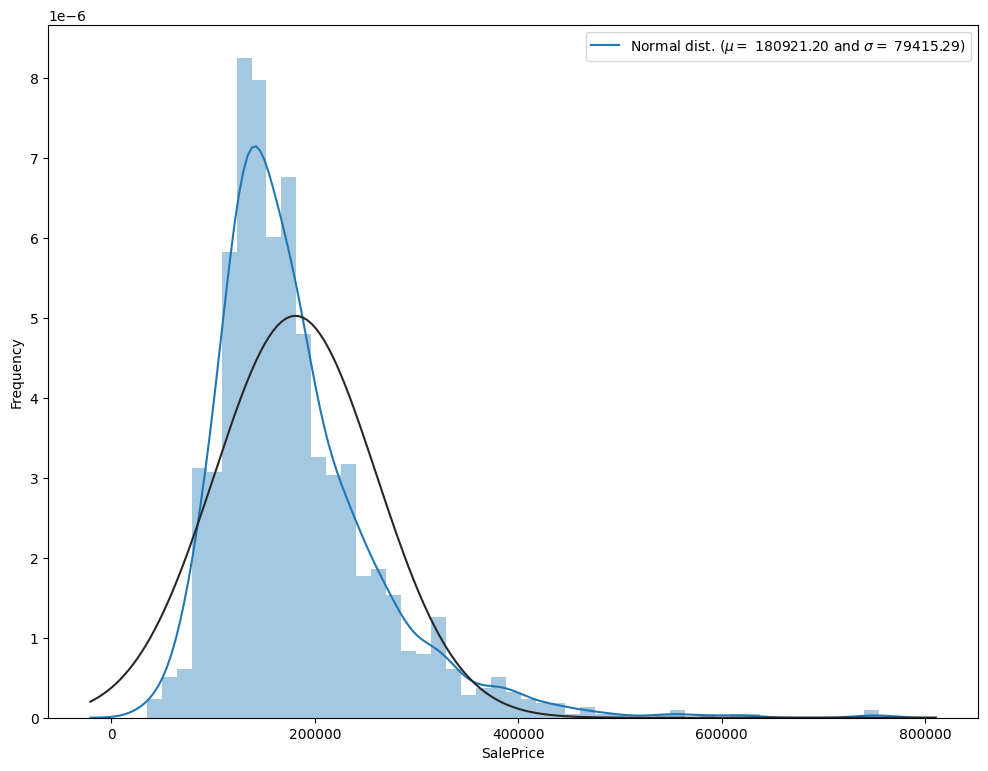

In [ ]:
plt.subplots(figsize=(12,9))
sns.distplot(hou['SalePrice'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(hou['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')


This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

Text(0, 0.5, 'Frequency')

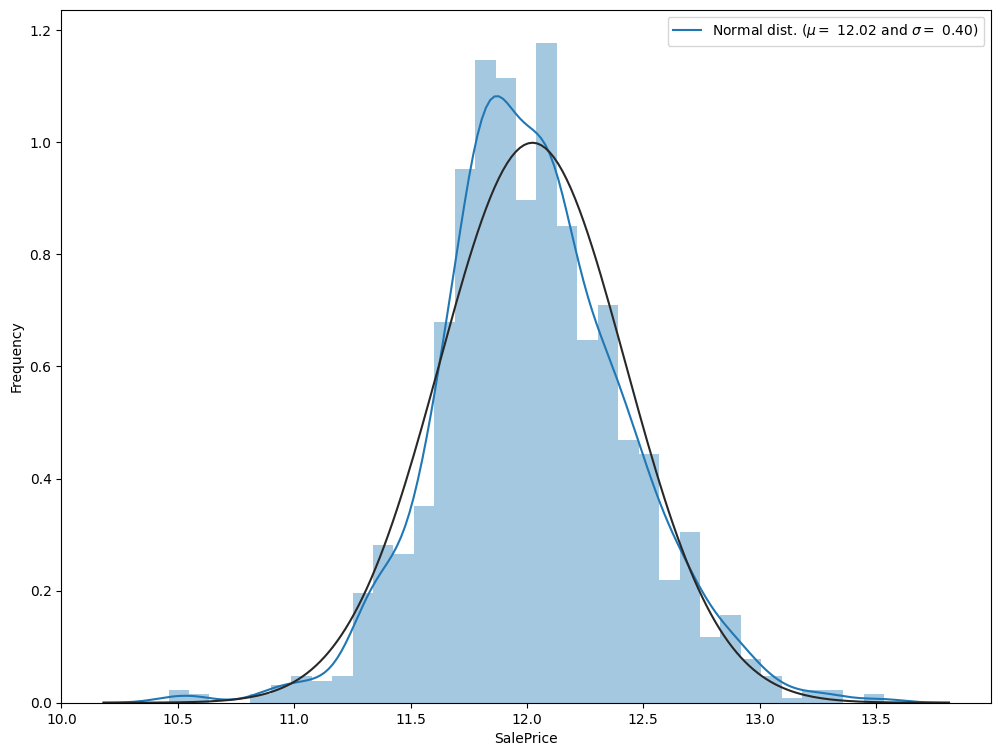

In [ ]:
#we use log function which is in numpy
hou['SalePrice'] = np.log1p(hou['SalePrice'])

#Check again for more normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(hou['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(hou['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')


## *Quantity of Missing Values*

In [ ]:
Isnull =  hou.isnull().sum() / len(hou)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace = True, ascending = False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

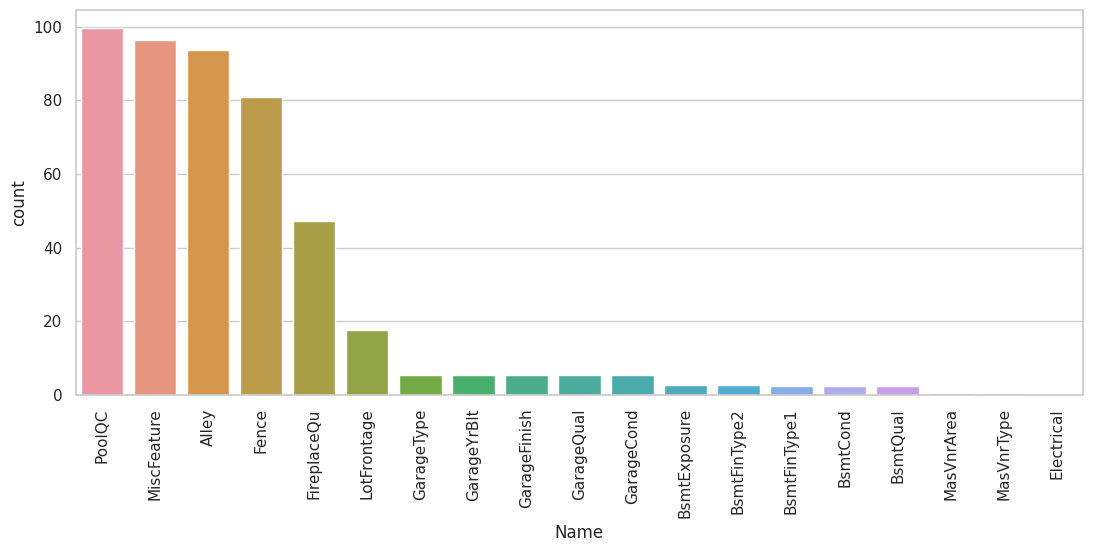

In [ ]:
#Convert into dataframe
Isnull = Isnull.to_frame()
Isnull.columns = ['count']
Isnull.index.names = ['Name']

# print(Isnull)
Isnull['Name'] = Isnull.index

#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

## *Finding Top Features in coorelation*

In [ ]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes

train_corr = hou.select_dtypes(include = [np.number])

In [ ]:
train_corr.shape

(1460, 38)

In [ ]:
train_corr = train_corr.drop(columns = 'Id')

<Axes: >

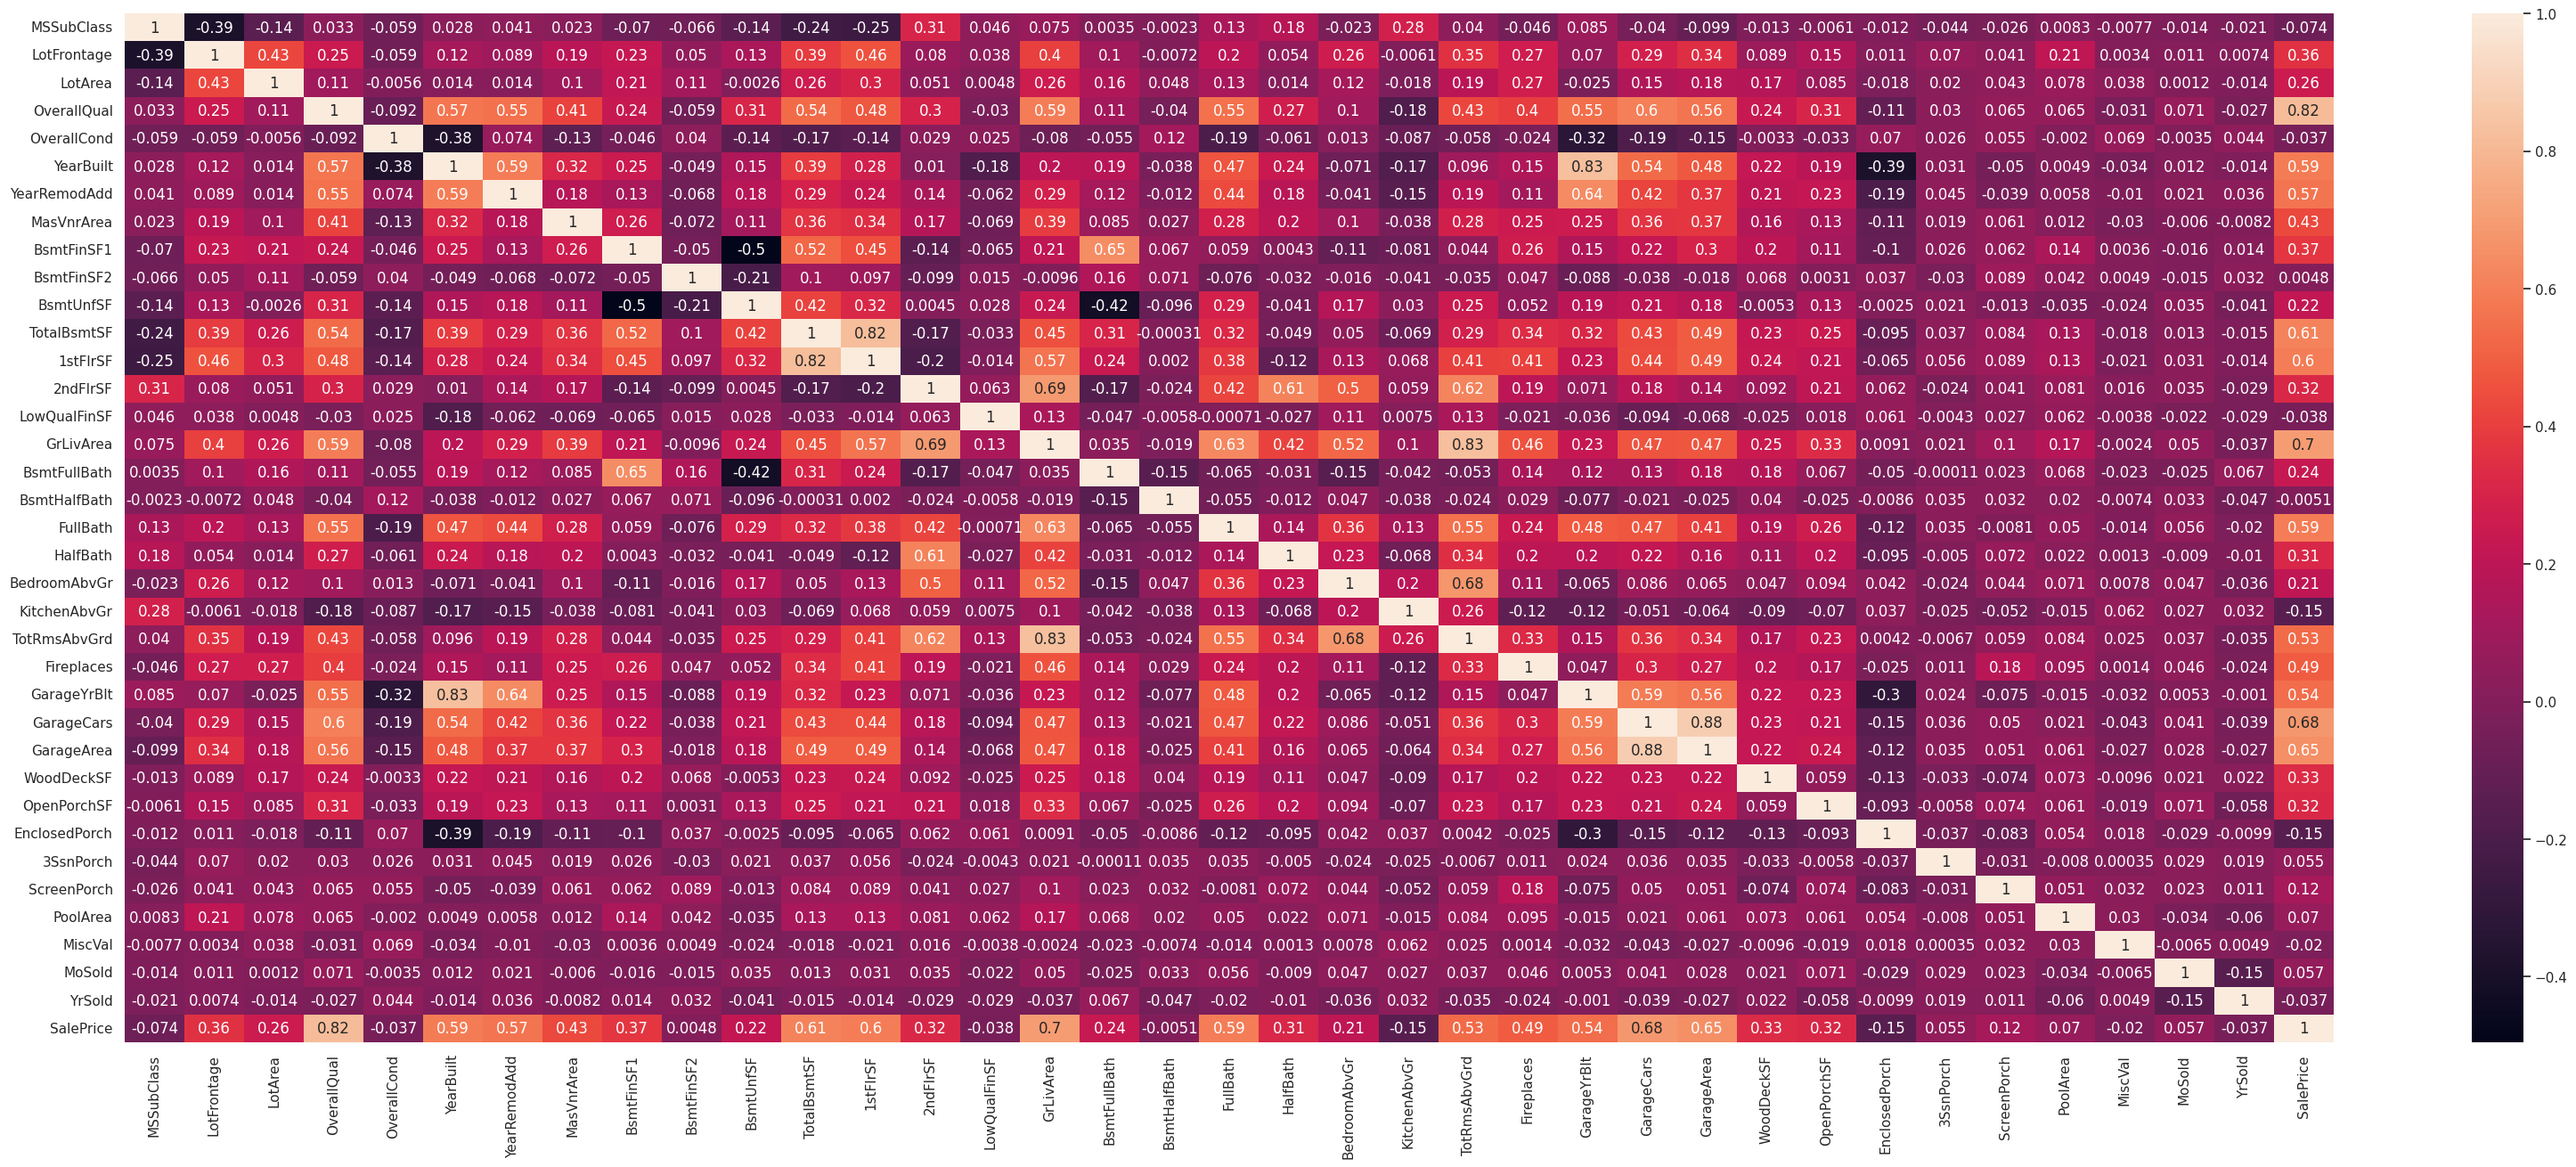

In [ ]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(40,15))
sns.heatmap(corr, annot=True)

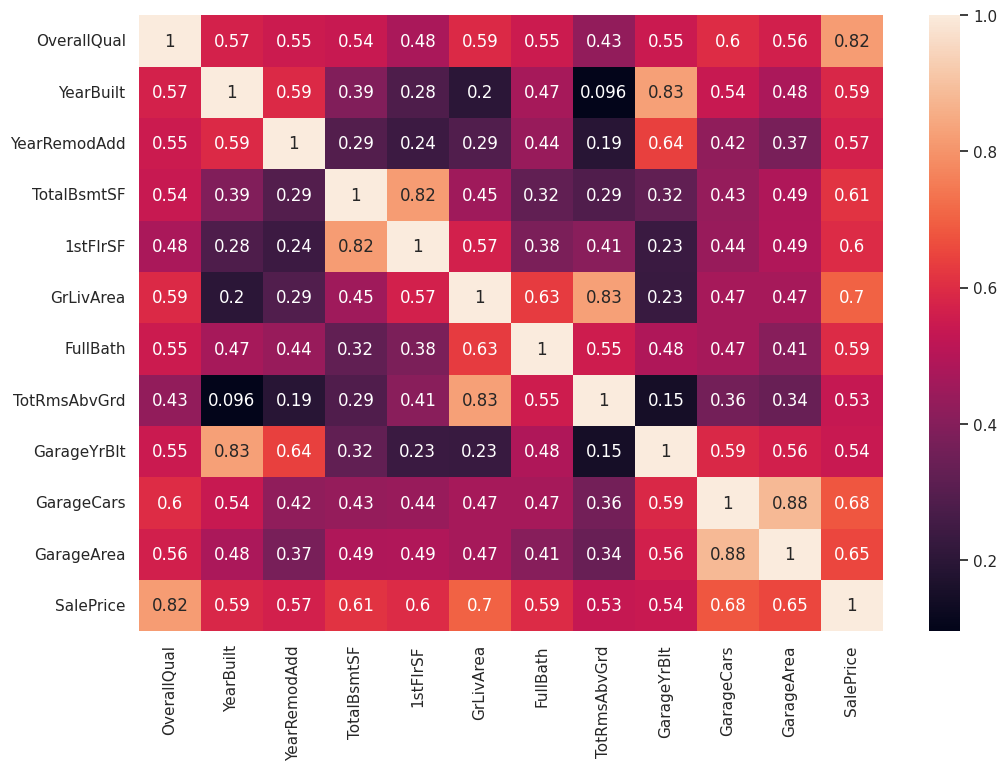

In [ ]:
thres = (corr['SalePrice'] > 0.5) | (corr['SalePrice'] < -0.5)
top_feature = corr.index[abs(thres)]

plt.subplots(figsize=(12, 8))
top_corr = hou[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [ ]:
print("Find most important features relative to target")
corr = hou.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

## *Handling Missing Values*

In [ ]:
hou['MiscFeature'] = hou['MiscFeature'].fillna('None')
hou['Alley'] = hou['Alley'].fillna('None')
hou['Fence'] = hou['Fence'].fillna('None')
hou['FireplaceQu'] = hou['FireplaceQu'].fillna('None')

#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    hou[col] = hou[col].fillna('None')

#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    hou[col] = hou[col].fillna(int(0))

#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    hou[col] = hou[col].fillna('None')

hou['Electrical'] = hou['Electrical'].fillna(hou['Electrical']).mode()[0]

hou['MasVnrArea'] = hou['MasVnrArea'].fillna(int(0))

hou['MasVnrType'] = hou['MasVnrType'].fillna('None')

hou['LotFrontage'] = hou['LotFrontage'].fillna(hou['LotFrontage'].mean())

hou = hou.drop('PoolQC', axis = 1)

In [ ]:
hou.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [ ]:
hou.shape

(1460, 80)

In [ ]:
hou.duplicated().sum()

0

## *Dealing With Categorical Features, Label Encoding, Train_Test_Split*

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Extracting categorical columns:
catFeatures= [col for col in hou.columns if col in
              hou.select_dtypes(include=object).columns]

# Encoding Categorical Data
labelEncode = LabelEncoder()

# Iterating Over each categorial features:
for col in catFeatures:
    # storing its numerical value:
    hou[col] = labelEncode.fit_transform(hou[col])



In [ ]:
y = hou['SalePrice']
#Take their values in X and y
X = hou.drop('SalePrice', axis = 1).values
y = y.values

In [ ]:
X.shape

(1460, 79)

In [ ]:
y.shape

(1460,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
#This command shows the order pair of test and train

print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", y_test.shape)

shape of X_train:  (1168, 79)
shape of Y_train:  (1168,)
shape of X_test:  (292, 79)
shape of Y_test:  (292,)


## *Model: Linear Regression*

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
#Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Prediction
print("Predict value " + str(model.predict([X_test[150]])))
print("Real value " + str(y_test[150]))

Predict value [11.8883059]
Real value 12.103491596905931


In [ ]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.62154463970859


## *Model: Random Forest Regressor*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=1000)
#Fit
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [11.70925155]
Real value 11.767187766223199


In [ ]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.51357514717174


## *Model: Grading Bosting Regressor*

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
GBR.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [ ]:
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [11.70925155]
Real value 11.767187766223199


In [ ]:
#Score/Accuracy
print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  91.77837512693186
